## 1. Vehicle Detector using YOLOv4

In [41]:
import cv2
import numpy as np

In [42]:
class VehicleDetector:

    def __init__(self):
        # Load Network
        net = cv2.dnn.readNet("dnn_model/yolov4.weights", "dnn_model/yolov4.cfg")
        self.model = cv2.dnn_DetectionModel(net)
        self.model.setInputParams(size=(832, 832), scale=1 / 255)


        # Allow classes containing Vehicles only
        self.classes_allowed = [1,2, 3, 4, 6, 7, 8, 9, 10]


    def detect_vehicles(self, img):
        # Detect Objects
        vehicles_boxes = []
        class_ids, scores, boxes = self.model.detect(img, nmsThreshold=0.4)
        for class_id, score, box in zip(class_ids, scores, boxes):
            if score < 0.5:
                # Skip detection with low confidence
                continue

            if class_id in self.classes_allowed:
                vehicles_boxes.append(box)

        return vehicles_boxes

## 2. Vehicle Counting and Detection using OpenCV

In [43]:
import cv2
import  matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [44]:
# Load Veichle Detector
vd = VehicleDetector()

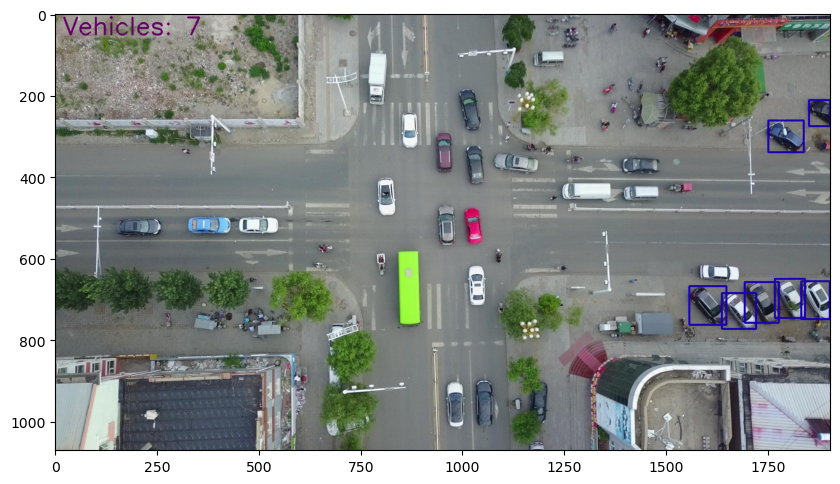

-1

In [45]:
figure(figsize=(10, 10), dpi=100)

img = cv2.imread("image.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


vehicle_boxes = vd.detect_vehicles(rgb_img)
vehicle_count = len(vehicle_boxes)

for box in vehicle_boxes:
        x, y, w, h = box

        cv2.rectangle(rgb_img, (x, y), (x + w, y + h), (25, 0, 180), 3)
        cv2.putText(rgb_img, "Vehicles: " + str(vehicle_count), (20,50), 0, 2, (100, 0, 100), 3)

plt.imshow(rgb_img)
plt.show()
cv2.waitKey(0)

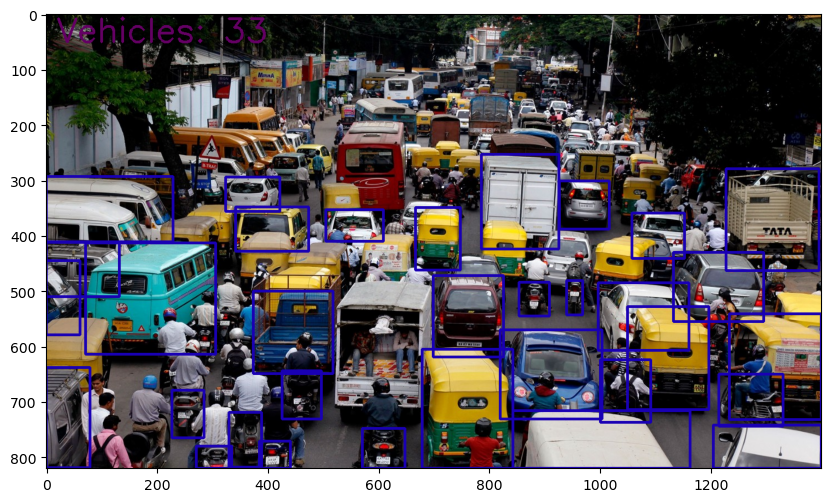

-1

In [46]:
figure(figsize=(10, 10), dpi=100)

img = cv2.imread("image2.jpeg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


vehicle_boxes = vd.detect_vehicles(rgb_img)
vehicle_count = len(vehicle_boxes)

for box in vehicle_boxes:
        x, y, w, h = box

        cv2.rectangle(rgb_img, (x, y), (x + w, y + h), (25, 0, 180), 3)
        cv2.putText(rgb_img, "Vehicles: " + str(vehicle_count), (20,50), 0, 2, (100, 0, 100), 3)

plt.imshow(rgb_img)
plt.show()
cv2.waitKey(0)